# Tarea - Ajuste de curvas

### Carolina Martínez Escalante 

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [300]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

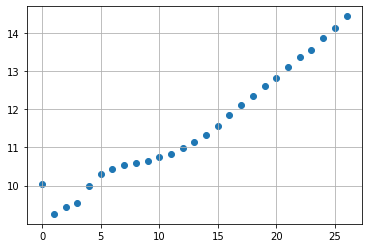

In [301]:
datos=len(data)
x = np.linspace(0, 26, datos)
y= np.reshape(data, [datos, -1])
plt.figure()
plt.scatter(x, y) #los hace puntitos
plt.grid()

In [302]:
import scipy.optimize as opt

In [303]:
def funcion_1(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [304]:
ones=np.ones([datos,1])
x_1=np.reshape(x,[datos,-1])

X=np.hstack((ones,x_1)) 

In [305]:
beta_inicial = np.random.rand(2)
y=np.reshape(y,[datos,-1])

In [306]:
funcion_1(beta_inicial,X,y)

532.7294883984862

In [307]:
sol=opt.minimize(funcion_1, beta_inicial, args=(X,y))
sol

      fun: 2.3704889518158474
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([1.31130219e-06, 5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.11567642, 0.18667055])

In [308]:
y_pred_1=X @ sol.x
y_pred_1

array([ 9.11567642,  9.30234697,  9.48901752,  9.67568807,  9.86235862,
       10.04902917, 10.23569972, 10.42237027, 10.60904082, 10.79571137,
       10.98238192, 11.16905247, 11.35572302, 11.54239357, 11.72906412,
       11.91573467, 12.10240522, 12.28907577, 12.47574632, 12.66241687,
       12.84908742, 13.03575797, 13.22242852, 13.40909907, 13.59576962,
       13.78244017, 13.96911072])

In [309]:
def funcion_2(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [310]:
ones=np.ones([datos,1])
x_1=np.reshape(x,[datos,-1])
x_2=np.reshape(x**2,[datos,-1])

X=np.hstack((ones,x_1,x_2)) 

In [311]:
beta_inicial = np.random.rand(3)
y=np.reshape(y,[datos,-1])

In [312]:
funcion_2(beta_inicial,X,y)

1005020.7394327917

In [313]:
sol=opt.minimize(funcion_2, beta_inicial, args=(X,y))
sol

      fun: 0.8443845194031611
 hess_inv: array([[ 1.44232052e-01, -2.17579551e-02,  6.84202593e-04],
       [-2.17579551e-02,  4.57469038e-03, -1.64206749e-04],
       [ 6.84202593e-04, -1.64206749e-04,  6.31559113e-06]])
      jac: array([7.45058060e-09, 1.11758709e-07, 2.29477882e-06])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([9.59128645e+00, 7.25241276e-02, 4.39024721e-03])

In [314]:
y_pred_2=X @ sol.x
y_pred_2

array([ 9.59128645,  9.66820082,  9.75389569,  9.84837105,  9.95162691,
       10.06366326, 10.18448011, 10.31407745, 10.45245529, 10.59961362,
       10.75555244, 10.92027176, 11.09377158, 11.27605188, 11.46711269,
       11.66695398, 11.87557577, 12.09297806, 12.31916084, 12.55412411,
       12.79786788, 13.05039215, 13.31169691, 13.58178216, 13.8606479 ,
       14.14829415, 14.44472088])

In [315]:
def funcion_3(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]


In [316]:
ones=np.ones([datos,1])
x_1=np.reshape(x,[datos,-1])
x_2=np.reshape(x**2,[datos,-1])
x_3=np.reshape(x**3,[datos,-1])

X=np.hstack((ones,x_1,x_2,x_3)) 

In [317]:
beta_inicial = np.random.rand(4)
y=np.reshape(y,[datos,-1])

In [318]:
funcion_3(beta_inicial,X,y)

456822102.5852011

In [319]:
sol=opt.minimize(funcion_3, beta_inicial, args=(X,y))
sol

      fun: 0.8404336707699542
 hess_inv: array([[ 2.27239985e-01, -6.41155859e-02,  4.83489729e-03,
        -1.06428585e-04],
       [-6.41155859e-02,  2.61881497e-02, -2.28211717e-03,
         5.43054644e-05],
       [ 4.83489729e-03, -2.28211717e-03,  2.13849492e-04,
        -5.32138254e-06],
       [-1.06428585e-04,  5.43054644e-05, -5.32138254e-06,
         1.36445671e-07]])
      jac: array([-0.00059865, -0.00010848, -0.00016876, -0.00041265])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 262
      nit: 10
     njev: 50
   status: 2
  success: False
        x: array([9.56739314e+00, 8.46854879e-02, 3.19939368e-03, 3.05246332e-05])

In [320]:
y_pred_3=X @ sol.x
y_pred_3

array([ 9.56739314,  9.65530854,  9.74980588,  9.85106831,  9.95927896,
       10.074621  , 10.19727756, 10.32743179, 10.46526685, 10.61096587,
       10.76471202, 10.92668843, 11.09707825, 11.27606463, 11.46383072,
       11.66055967, 11.86643462, 12.08163873, 12.30635513, 12.54076698,
       12.78505743, 13.03940962, 13.30400671, 13.57903183, 13.86466814,
       14.16109878, 14.4685069 ])

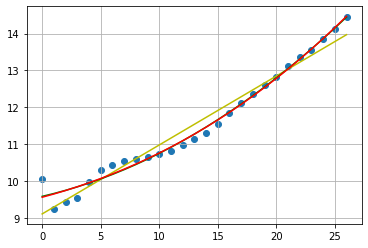

In [321]:
datos=len(data)
x = np.linspace(0, 26, datos)
y= np.reshape(data, [datos, -1])
plt.figure()
plt.scatter(x, y) #los hace puntitos
plt.grid()
plt.plot(y_pred_1,"y")
plt.plot(y_pred_2,"g")
plt.plot(y_pred_3,"r")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [322]:
data=pd.read_excel("population_data.xlsx")

In [323]:
poblacion=data["Poblacion"]
poblacion

0      28296
1      29110
2      29980
3      30904
4      31880
       ...  
61    115683
62    117054
63    118395
64    119713
65    121005
Name: Poblacion, Length: 66, dtype: int64

In [324]:
pob=np.array([poblacion])
pob

array([[ 28296,  29110,  29980,  30904,  31880,  32906,  33978,  35095,
         36253,  37448,  38677,  39939,  41234,  42564,  43931,  45339,
         46784,  48264,  49788,  51361,  52988,  54669,  56396,  58156,
         59931,  61708,  63486,  65261,  67013,  68715,  70353,  71916,
         73416,  74880,  76351,  77859,  79410,  80999,  82635,  84327,
         86077,  87890,  89758,  91654,  93542,  95393,  97202,  98969,
        100679, 102317, 103874, 105340, 106724, 108056, 109382, 110732,
        112117, 113530, 114968, 116423, 114255, 115683, 117054, 118395,
        119713, 121005]], dtype=int64)

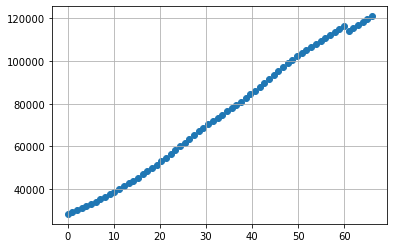

In [325]:
m=66
x = np.linspace(0, 66, m)
y= np.reshape(pob, [m, -1])
plt.figure()
plt.scatter(x, y)
plt.grid()

In [326]:
def funcion_a(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [327]:
ones=np.ones([m,1])
x_1=np.reshape(x,[m,-1])

X=np.hstack((ones,x_1)) 

In [328]:
beta_inicial = np.random.rand(2)
y=np.reshape(y,[m,-1])

In [329]:
funcion_a(beta_inicial,X,y)

421555847177.17114

In [330]:
sol=opt.minimize(funcion_1, beta_inicial, args=(X,y))
sol

      fun: 212137169.5442791
 hess_inv: array([[ 2.29973663e-02, -4.68515771e-04],
       [-4.68515771e-04,  1.41001329e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 99
      nit: 10
     njev: 33
   status: 0
  success: True
        x: array([24138.01567657,  1520.57987394])

In [331]:
y_pred_a=X @ sol.x
y_pred_a

array([ 24138.01567657,  25681.98908703,  27225.96249749,  28769.93590795,
        30313.90931841,  31857.88272888,  33401.85613934,  34945.8295498 ,
        36489.80296026,  38033.77637073,  39577.74978119,  41121.72319165,
        42665.69660211,  44209.67001257,  45753.64342304,  47297.6168335 ,
        48841.59024396,  50385.56365442,  51929.53706489,  53473.51047535,
        55017.48388581,  56561.45729627,  58105.43070674,  59649.4041172 ,
        61193.37752766,  62737.35093812,  64281.32434858,  65825.29775905,
        67369.27116951,  68913.24457997,  70457.21799043,  72001.1914009 ,
        73545.16481136,  75089.13822182,  76633.11163228,  78177.08504275,
        79721.05845321,  81265.03186367,  82809.00527413,  84352.97868459,
        85896.95209506,  87440.92550552,  88984.89891598,  90528.87232644,
        92072.84573691,  93616.81914737,  95160.79255783,  96704.76596829,
        98248.73937876,  99792.71278922, 101336.68619968, 102880.65961014,
       104424.6330206 , 1

In [332]:
def funcion_b(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [333]:
ones=np.ones([m,1])
x_1=np.reshape(x,[m,-1])
x_2=np.reshape(x**2,[m,-1])

X=np.hstack((ones,x_1,x_2))

In [334]:
beta_inicial = np.random.rand(3)
y=np.reshape(y,[m,-1])

In [335]:
funcion_b(beta_inicial,X,y)

406053354776.2555

In [336]:
sol=opt.minimize(funcion_2, beta_inicial, args=(X,y))
sol

      fun: 210941621.47495908
 hess_inv: array([[1.65869236e-02, 1.28812145e-05, 1.28812145e-05],
       [1.28812145e-05, 1.89604166e-08, 1.89604166e-08],
       [1.28812145e-05, 1.89604166e-08, 1.89604169e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 219
      nit: 11
     njev: 53
   status: 0
  success: True
        x: array([2.44256503e+04, 1.49402407e+03, 4.02353198e-01])

In [337]:
y_pred_b=X @ sol.x
y_pred_b

array([ 24425.65025089,  25943.07413711,  27461.3276804 ,  28980.41088073,
        30500.32373813,  32021.06625257,  33542.63842408,  35065.04025264,
        36588.27173825,  38112.33288092,  39637.22368065,  41162.94413743,
        42689.49425126,  44216.87402215,  45745.0834501 ,  47274.1225351 ,
        48803.99127716,  50334.68967627,  51866.21773244,  53398.57544566,
        54931.76281594,  56465.77984327,  58000.62652766,  59536.30286911,
        61072.80886761,  62610.14452316,  64148.30983577,  65687.30480544,
        67227.12943216,  68767.78371594,  70309.26765677,  71851.58125466,
        73394.7245096 ,  74938.6974216 ,  76483.49999065,  78029.13221676,
        79575.59409993,  81122.88564015,  82671.00683742,  84219.95769175,
        85769.73820314,  87320.34837158,  88871.78819707,  90424.05767963,
        91977.15681923,  93531.08561589,  95085.84406961,  96641.43218039,
        98197.84994821,  99755.0973731 , 101313.17445504, 102872.08119403,
       104431.81759008, 1

In [338]:
def funcion_c(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [339]:
ones=np.ones([m,1])
x_1=np.reshape(x,[m,-1])
x_2=np.reshape(x**2,[m,-1])
x_3=np.reshape(x**3,[m,-1])

X=np.hstack((ones,x_1,x_2,x_3)) 

In [340]:
beta_inicial = np.random.rand(4)
y=np.reshape(y,[m,-1])

In [341]:
funcion_c(beta_inicial,X,y)

175994895348.904

In [342]:
sol=opt.minimize(funcion_3, beta_inicial, args=(X,y))
sol

      fun: 25240442.642343454
 hess_inv: array([[ 1.63668065e-01, -2.07198319e-02,  6.57616114e-04,
        -5.95163841e-06],
       [-2.07198319e-02,  3.21449519e-03, -1.09949052e-04,
         1.03459375e-06],
       [ 6.57616114e-04, -1.09949052e-04,  3.91767650e-06,
        -3.78371434e-08],
       [-5.95163841e-06,  1.03459375e-06, -3.78371434e-08,
         3.72315521e-10]])
      jac: array([ 0. ,  2. , -3.5, -6. ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 182
      nit: 8
     njev: 34
   status: 2
  success: False
        x: array([ 2.84777658e+04,  7.27879955e+02,  2.96457124e+01, -2.95388052e-01])

In [343]:
y_pred_c=X @ sol.x
y_pred_c

array([ 28477.76582779,  29247.09960903,  30075.70780707,  30961.73502891,
        31903.32588155,  32898.624972  ,  33945.77690728,  35042.92629438,
        36188.21774031,  37379.79585209,  38615.80523671,  39894.39050117,
        41213.6962525 ,  42571.86709769,  43967.04764376,  45397.3824977 ,
        46861.01626652,  48356.09355724,  49880.75897685,  51433.15713237,
        53011.43263079,  54613.73007913,  56238.1940844 ,  57882.96925359,
        59546.20019372,  61226.03151179,  62920.60781481,  64628.07370978,
        66346.57380372,  68074.25270362,  69809.2550165 ,  71549.72534936,
        73293.8083092 ,  75039.64850304,  76785.39053788,  78529.17902072,
        80269.15855858,  82003.47375846,  83730.26922736,  85447.6895723 ,
        87153.87940027,  88846.98331829,  90525.14593336,  92186.51185249,
        93829.22568268,  95451.43203095,  97051.27550429,  98626.90070971,
       100176.45225423, 101698.07474484, 103189.91278855, 104650.11099238,
       106076.81396332, 1

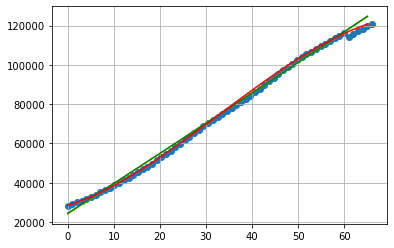

In [344]:
m=66
x = np.linspace(0, 66, m)
y= np.reshape(pob, [m, -1])
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(y_pred_a,"y")
plt.plot(y_pred_b,"g")
plt.plot(y_pred_c,"r")

In [345]:
naciminetos=data["Nacimientos"]
naciminetos

0     1174947
1     1183788
2     1195209
3     1261775
4     1339837
       ...   
61    2586287
62    2498880
63    2478889
64    2463420
65    2353596
Name: Nacimientos, Length: 66, dtype: int64

In [346]:
nacimientos=np.array([naciminetos])
naciminetos

0     1174947
1     1183788
2     1195209
3     1261775
4     1339837
       ...   
61    2586287
62    2498880
63    2478889
64    2463420
65    2353596
Name: Nacimientos, Length: 66, dtype: int64

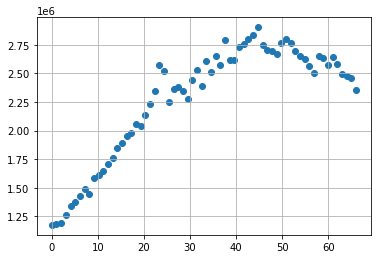

In [387]:
m=66
x = np.linspace(0, 66, m)
y = np.reshape(nacimientos, [m, -1])
plt.figure()
plt.scatter(x,y)
plt.grid()


In [388]:
def funcion_a1(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [389]:
ones=np.ones([m,1])
x_1=np.reshape(x,[m,-1])

X=np.hstack((ones,x_1)) 

In [390]:
beta_inicial = np.random.rand(2)
y=np.reshape(y,[m,-1])

In [391]:
funcion_a1(beta_inicial,X,y)

358558742129471.25

In [392]:
sol=opt.minimize(funcion_a1, beta_inicial, args=(X,y))
sol

      fun: 4737913805770.157
 hess_inv: array([[ 2.93290129e-02, -6.61063258e-04],
       [-6.61063258e-04,  2.00783390e-05]])
      jac: array([    0., 65536.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 150
      nit: 5
     njev: 46
   status: 2
  success: False
        x: array([1563293.59945874,   21636.91828749])

In [393]:
y_pred_a1=Y @ sol.x
y_pred_a1

array([2.54237955e+10, 2.56150875e+10, 2.58622028e+10, 2.73024859e+10,
       2.89915070e+10, 2.98154408e+10, 3.08930675e+10, 3.21367576e+10,
       3.13226902e+10, 3.43957384e+10, 3.47974927e+10, 3.56376975e+10,
       3.69029163e+10, 3.80094932e+10, 4.00170531e+10, 4.08557649e+10,
       4.22874582e+10, 4.28721526e+10, 4.45357720e+10, 4.40881042e+10,
       4.61451043e+10, 4.82821611e+10, 5.07618169e+10, 5.56579269e+10,
       5.45824206e+10, 4.87819307e+10, 5.12011112e+10, 5.14828672e+10,
       5.07804246e+10, 4.92096925e+10, 5.29306150e+10, 5.47572902e+10,
       5.17754416e+10, 5.64541872e+10, 5.43512085e+10, 5.74620997e+10,
       5.57608754e+10, 6.04635514e+10, 5.67342338e+10, 5.66959581e+10,
       5.91852855e+10, 5.96425818e+10, 6.05286136e+10, 6.14436172e+10,
       6.28435908e+10, 5.95126954e+10, 5.85882364e+10, 5.83871645e+10,
       5.77381435e+10, 5.99161157e+10, 6.05489956e+10, 5.98841147e+10,
       5.84014233e+10, 5.74669248e+10, 5.67996855e+10, 5.55631356e+10,
      

In [394]:
def funcion_b2(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [395]:
ones=np.ones([m,1])
x_1=np.reshape(x,[m,-1])
x_2=np.reshape(x**2,[m,-1])


X=np.hstack((ones,x_1,x_2)) 

In [396]:
beta_inicial = np.random.rand(3)
y=np.reshape(y,[m,-1])

In [397]:
funcion_b2(beta_inicial,X,y)

358119566131669.8

In [398]:
sol=opt.minimize(funcion_2, beta_inicial, args=(X,y))
sol

      fun: 492921079993.89075
 hess_inv: array([[ 1.57874020e-02, -7.71128913e-05, -5.06943294e-06],
       [-7.71128913e-05,  7.20411995e-06, -1.05627777e-07],
       [-5.06943294e-06, -1.05627777e-07,  6.41502620e-09]])
      jac: array([     0.,   8192., 270336.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 202
      nit: 10
     njev: 48
   status: 2
  success: False
        x: array([ 1.02117126e+06,  7.16713528e+04, -7.58008262e+02])

In [399]:
y_pred_b2=X @ sol.x
y_pred_b2

array([1021171.25993846, 1093163.7379325 , 1163593.19391897,
       1232459.62789786, 1299763.03986919, 1365503.42983295,
       1429680.79778914, 1492295.14373775, 1553346.4676788 ,
       1612834.76961228, 1670760.04953819, 1727122.30745653,
       1781921.54336729, 1835157.75727049, 1886830.94916612,
       1936941.11905418, 1985488.26693467, 2032472.39280759,
       2077893.49667294, 2121751.57853072, 2164046.63838093,
       2204778.67622357, 2243947.69205864, 2281553.68588614,
       2317596.65770607, 2352076.60751843, 2384993.53532322,
       2416347.44112044, 2446138.32491009, 2474366.18669218,
       2501031.02646669, 2526132.84423363, 2549671.639993  ,
       2571647.4137448 , 2592060.16548904, 2610909.8952257 ,
       2628196.60295479, 2643920.28867632, 2658080.95239027,
       2670678.59409665, 2681713.21379547, 2691184.81148671,
       2699093.38717038, 2705438.94084649, 2710221.47251502,
       2713440.98217599, 2715097.46982938, 2715190.93547521,
       2713721.37911346,

In [400]:
def funcion_c3(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [401]:
ones=np.ones([m,1])
x_1=np.reshape(x,[m,-1])
x_2=np.reshape(x**2,[m,-1])
x_3=np.reshape(x**3,[m,-1])

X=np.hstack((ones,x_1,x_2,x_3)) 

In [402]:
beta_inicial = np.random.rand(4)
y=np.reshape(y,[m,-1])

In [403]:
funcion_c(beta_inicial,X,y)

348963754374971.1

In [404]:
sol=opt.minimize(funcion_3, beta_inicial, args=(X,y))
sol

      fun: 441782332785.47797
 hess_inv: array([[ 7.86491503e-02, -7.36684654e-03,  1.97430103e-04,
        -1.60067111e-06],
       [-7.36684654e-03,  1.12056996e-03, -3.77909363e-05,
         3.52061454e-07],
       [ 1.97430103e-04, -3.77909363e-05,  1.43003853e-06,
        -1.42954594e-08],
       [-1.60067111e-06,  3.52061454e-07, -1.42954594e-08,
         1.49433620e-10]])
      jac: array([0.0000000e+00, 4.0960000e+03, 2.0889600e+05, 1.1923456e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 308
      nit: 9
     njev: 60
   status: 2
  success: False
        x: array([ 1.08833101e+06,  5.89603117e+04, -2.72694629e+02, -4.90280953e+00])

In [405]:
y_pred_c3=X @ sol.x
y_pred_c3

array([1088331.01467978, 1147912.12569067, 1206900.14159549,
       1265264.26684112, 1322973.70587448, 1379997.66314246,
       1436305.34309196, 1491865.95016989, 1546648.68882314,
       1600622.76349861, 1653757.37864321, 1706021.73870384,
       1757385.04812738, 1807816.51136076, 1857285.33285085,
       1905760.71704458, 1953211.86838883, 1999607.9913305 ,
       2044918.2903165 , 2089111.96979373, 2132158.23420908,
       2174026.28800947, 2214685.33564178, 2254104.58155291,
       2292253.23018978, 2329100.48599927, 2364615.55342829,
       2398767.63692374, 2431525.94093252, 2462859.66990153,
       2492738.02827767, 2521130.22050784, 2548005.45103894,
       2573332.92431787, 2597081.84479153, 2619221.41690682,
       2639720.84511064, 2658549.33384989, 2675676.08757148,
       2691070.3107223 , 2704701.20774925, 2716537.98309923,
       2726549.84121914, 2734705.98655589, 2740975.62355637,
       2745327.95666749, 2747732.19033614, 2748157.52900922,
       2746573.17713364,

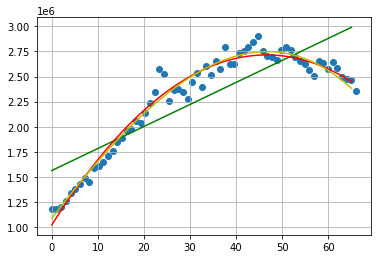

In [409]:
m=66
x = np.linspace(0, 66, m)
y = np.reshape(nacimientos, [m, -1])
plt.figure()
plt.scatter(x,y)
plt.grid()
plt.plot(1563293.59945874+  21636.91828749*x,"g")
plt.plot(y_pred_b2,"r")
plt.plot(y_pred_c3,"y")